Epoch 1
Weights: [1.76404754 0.38462594], Biases: [0.97873622 2.2253575 ], Train RMSE: 0.5520052017139735, Test RMSE: 0.7951557486684945
Weights: [1.76404137 0.3703987 ], Biases: [0.97873392 2.21112423], Train RMSE: 0.5742305391915007, Test RMSE: 0.7938162840361217
Weights: [1.7640358  0.35387893], Biases: [0.97873178 2.19459864], Train RMSE: 0.552578905751856, Test RMSE: 0.7922323026614672
Weights: [1.76403148 0.33792031], Biases: [0.97873021 2.17863558], Train RMSE: 0.5472907137318062, Test RMSE: 0.7906720239710758
Weights: [1.76402668 0.32260778], Biases: [0.97872846 2.16331782], Train RMSE: 0.5584447347545757, Test RMSE: 0.7891461705133163


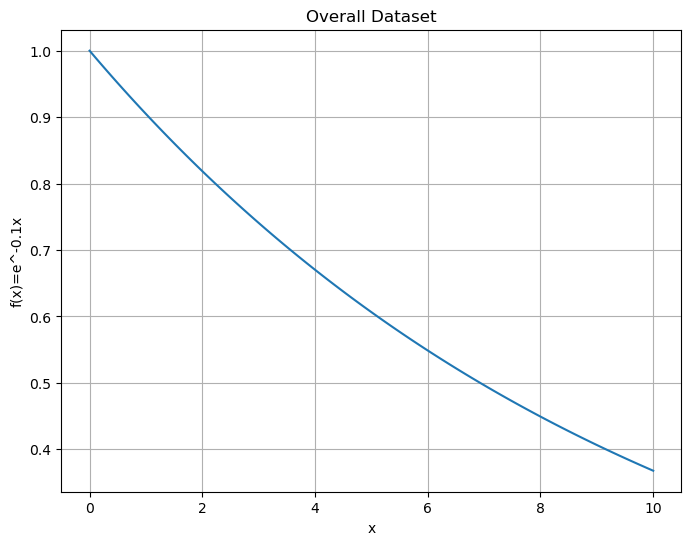

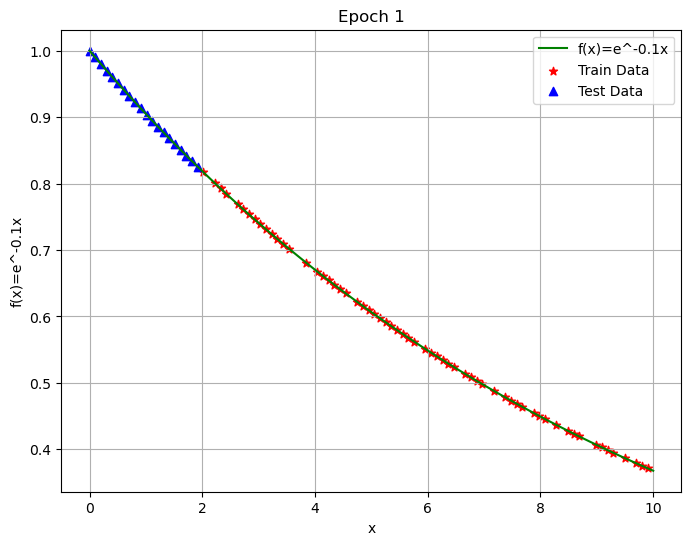

Epoch 2
Weights: [1.76402538 0.30745937], Biases: [0.97873934 2.14821481], Train RMSE: 0.590756542043271, Test RMSE: 0.6754023531197304
Weights: [1.76402307 0.29265222], Biases: [0.97874662 2.13344023], Train RMSE: 0.6079093375289334, Test RMSE: 0.67356057107091
Weights: [1.76402183 0.2782857 ], Biases: [0.97875876 2.11912888], Train RMSE: 0.6172739806722598, Test RMSE: 0.6717396398256397
Weights: [1.76402181 0.26345986], Biases: [0.97877179 2.10436442], Train RMSE: 0.6122370628366693, Test RMSE: 0.6698230898805345
Weights: [1.76402018 0.24690121], Biases: [0.97877616 2.08782796], Train RMSE: 0.5904064172395594, Test RMSE: 0.6676327167073727


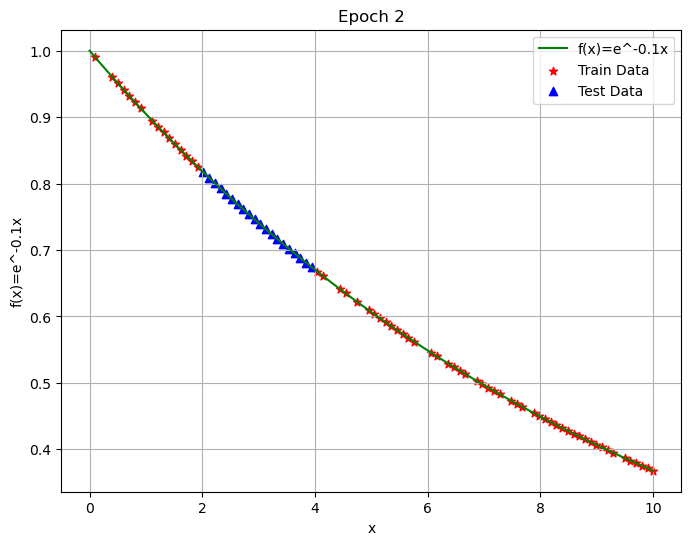

Epoch 3
Weights: [1.76401725 0.23162794], Biases: [0.9787868 2.0726128], Train RMSE: 0.6148170637936079, Test RMSE: 0.5540412665035656
Weights: [1.76401487 0.21767182], Biases: [0.97879595 2.05870915], Train RMSE: 0.6276229336076219, Test RMSE: 0.5517297172290364
Weights: [1.76401191 0.20334624], Biases: [0.97880288 2.04442608], Train RMSE: 0.6245867139293675, Test RMSE: 0.5493046612088044
Weights: [1.76401068 0.18839138], Biases: [0.97881524 2.02955105], Train RMSE: 0.6264477190633991, Test RMSE: 0.5467187244751281
Weights: [1.76400855 0.17378747], Biases: [0.97882339 2.01500514], Train RMSE: 0.6189474591933575, Test RMSE: 0.5441331524671239


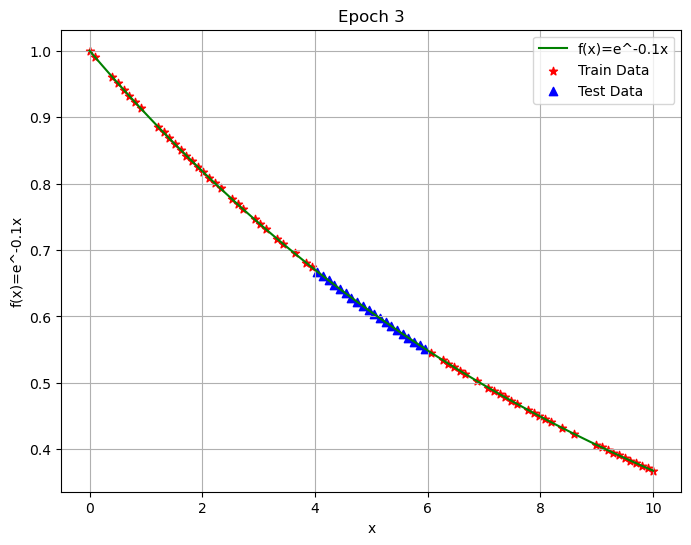

Epoch 4
Weights: [1.76400686 0.1607091 ], Biases: [0.97883314 2.00200066], Train RMSE: 0.642185765072762, Test RMSE: 0.42724992867478717
Weights: [1.76400531 0.14632527], Biases: [0.97884004 1.9876738 ], Train RMSE: 0.6164202768549997, Test RMSE: 0.4238903805610177
Weights: [1.76400419 0.13188571], Biases: [0.97885026 1.97332604], Train RMSE: 0.6233856331188841, Test RMSE: 0.42043326864146974
Weights: [1.76400467 0.11725909], Biases: [0.97886083 1.95880241], Train RMSE: 0.6197223335415377, Test RMSE: 0.41683825551527925
Weights: [1.76400508 0.10414632], Biases: [0.97886869 1.94577366], Train RMSE: 0.6301141508314123, Test RMSE: 0.4135301224457648


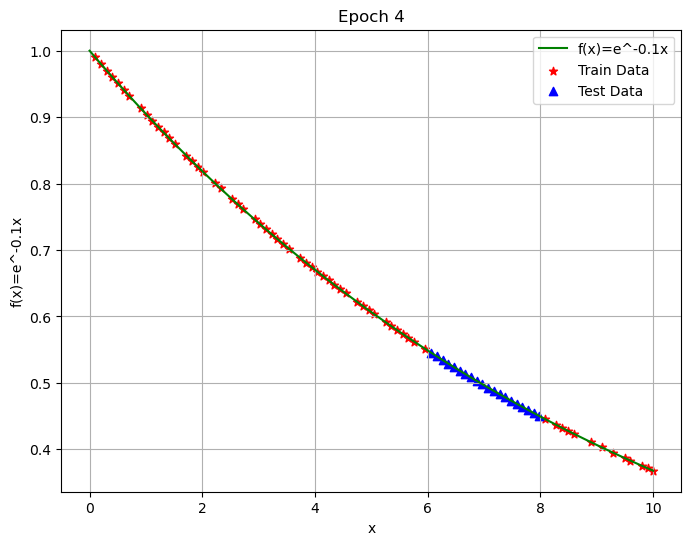

Epoch 5
Weights: [1.76400557 0.09129902], Biases: [0.9788773  1.93303174], Train RMSE: 0.6229979659847698, Test RMSE: 0.2803533230500166
Weights: [1.76400634 0.07779218], Biases: [0.97888655 1.91965391], Train RMSE: 0.6276468070858983, Test RMSE: 0.27527186118868663
Weights: [1.76400631 0.06504675], Biases: [0.97889216 1.90700111], Train RMSE: 0.6233136241224679, Test RMSE: 0.2703165179164153
Weights: [1.76400686 0.05322416], Biases: [0.97889863 1.89530529], Train RMSE: 0.6312584156781001, Test RMSE: 0.26558730936992236
Weights: [1.76400746 0.03901118], Biases: [0.97890267 1.88118668], Train RMSE: 0.6049046413863487, Test RMSE: 0.2597019476850828


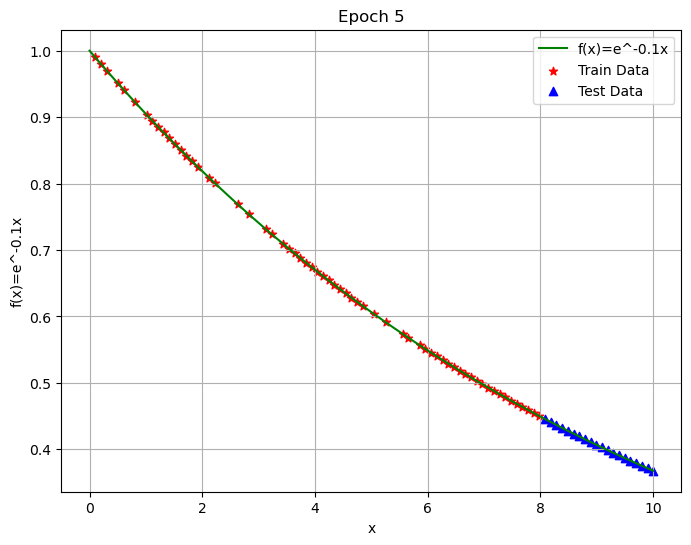

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

data_points = np.linspace(0, 10, 100)
function_values = np.exp(-0.1 * data_points)

plt.figure(figsize=(8, 6))  # Set the size of the overall dataset plot
plt.plot(data_points, function_values)
plt.xlabel("x")
plt.ylabel("f(x)=e^-0.1x")
plt.title("Overall Dataset")
plt.grid()

# Initialize weights and biases
np.random.seed(0)
weight = np.random.randn(2)
bias = np.random.randn(2)

epochs = 5
learning_rate = 0.01  # Adjusted learning rate

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}")

    # Define testing indices for each epoch
    start_idx = epoch * 20
    end_idx = (epoch + 1) * 20 if epoch < epochs - 1 else 100
    test_indices = np.arange(start_idx, end_idx)

    for train_indices, _ in kf.split(data_points):
        train_indices = np.setdiff1d(train_indices, test_indices)  # Exclude testing indices from training set
        train_data, test_data = data_points[train_indices], data_points[test_indices]
        train_values, test_values = function_values[train_indices], function_values[test_indices]

        for j in range(len(train_data)):
            # Forward pass
            a1 = train_data[j] * weight[0] + bias[0]
            z1 = 1 / (1 + np.exp(-a1))
            a2 = z1 * weight[1] + bias[1]
            z2 = 1 / (1 + np.exp(-a2))

            # Backpropagation
            dz2 = (z2 - train_values[j]) * z2 * (1 - z2)
            dz1 = dz2 * weight[1] * z1 * (1 - z1)

            # Gradient descent
            dbias2 = dz2
            dweight2 = dz2 * z1
            dbias1 = dz1
            dweight1 = dz1 * train_data[j]

            # Update weights and biases
            weight[0] -= learning_rate * dweight1
            bias[0] -= learning_rate * dbias1
            weight[1] -= learning_rate * dweight2
            bias[1] -= learning_rate * dbias2

        # Calculate RMSE for training and testing datasets
        train_predicted_values = 1 / (1 + (1 / (1 + np.exp(-train_data * weight[0] - bias[0])) * weight[1] + bias[1]))
        test_predicted_values = 1 / (1 + (1 / (1 + np.exp(-test_data * weight[0] - bias[0])) * weight[1] + bias[1]))
        train_rmse = np.sqrt(mean_squared_error(y_true=train_values, y_pred=train_predicted_values, squared=False))
        test_rmse = np.sqrt(mean_squared_error(y_true=test_values, y_pred=test_predicted_values, squared=False))

        # Print weights, biases, and RMSE
        print(f"Weights: {weight}, Biases: {bias}, Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

    # Plot only the last f(x) after each epoch (5) with training and testing points
    plt.figure(figsize=(8, 6))  # Set the size of each subplot
    plt.plot(data_points, function_values, 'g-', label='f(x)=e^-0.1x')
    plt.scatter(train_data, train_values, color='red', label='Train Data', marker='*')
    plt.scatter(test_data, test_values, color='blue', label='Test Data', marker='^')
    plt.xlabel("x")
    plt.ylabel("f(x)=e^-0.1x")
    plt.title(f'Epoch {epoch+1}')
    plt.legend()
    plt.grid()
    plt.show()
